#  Cousins and Alcohol

There is a certain stereotype that says that both alcohol consumption and cousin marriage are bad things, and that they go hand in hand. Regardless of the first part of the stereotype, we can use data to address the second part. Is this just anecdotal or is there a trend in global data that backs this up? To investigate this, we run a simple linear regression between two data sets:  the amount and type of alcohol consumed annually per capita by country; and the rate of cousin marriage by country.

The usual caveats apply: this is just using country-wide data and the sources may not have collected it with the same precision in each country. Nevertheless, it is a first step.

First, we'll import the data analysis package pandas for Python. We could just write up the functions themselves (in fact this is done at the end) as they are not going to be very complex, but why re-invent the wheel?

In [1]:
import pandas as pd

Next, we import the two data sets. The first, on cousin marriage, comes from Prof Alan Bittles of Edith Cowan University via fivethirtyeight.com, and can be imported like so:

In [2]:
cousin_df=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/cousin-marriage/cousin-marriage-data.csv')

Note that this is not a list, but a data frame:

In [3]:
type(cousin_df)

pandas.core.frame.DataFrame

We can peek at the top lines of the data frame with the head() command:

In [4]:
cousin_df.head()

,Country,Percent
0,Burkina Faso,65.8
1,Kuwait,51.7
2,Nigeria,51.2
3,Pakistan,51.0
4,Sudan,50.4


Wow, Burkina Faso is way out ahead. Next, we import the other data set on cousin marriage. This comes courtesy of the World Health Organization via fivethirtyeight.com.

In [5]:
alco_df=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')

In [6]:
alco_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Now, a quick glance at both sets shows that there are some naming inconsistencies, e.g. one having the USA under 'United States' and the other under 'USA'. This would be a problem with larger data sets, but we can just do some ad hoc editing here. We will replace 'The Netherlands' by 'Netherlands', 'USA' by 'United States' and 'Great Britian' by 'United Kingdom'. To do this, use the 'replace' function on the dataframe, with a dictionary telling the 'to_replace' command what to do. The second command, inplace='True', tells it to replace the old data frame with the new, correct one.

In [7]:
alco_df['country'].replace(to_replace={'USA':'United States'},inplace=True)

For the other dataframe we must replace two entries:

In [8]:
cousin_df['Country'].replace(to_replace={'The Netherlands':'Netherlands','Great Britain':'United Kingdom'},inplace=True)

Next thing to do is merge both dataframes along the country column. First thing we do is again make a simple edit so that the 'country' in alco_df matches 'Country' (note the capital C!) in cousin_df.

In [9]:
alco_df.rename(columns={'country':'Country'},inplace=True)

Now we are ready to merge the data frames. We use the .join() command.

In [10]:
df=pd.merge(alco_df,cousin_df,on='Country')

Note that this has also discarded any entries with incomplete data, i.e. countries appearing in one data frame but not the other. Next, we import the package statsmodels.api to do the computation of what we are interested in, namely the regression coefficient $\beta_1$ and $R^2.$

In [11]:
import statsmodels.api as sm

We'll also import a graphing package matplotlib.pyplot:

In [12]:
import matplotlib.pyplot as plt

In [13]:
X=df['total_litres_of_pure_alcohol']
X1=sm.add_constant(X)
Y=df['Percent']

Note that we had to use the function add_constant on X so that the regression line would not be forced to pass through the origin. Next, we specify the kind of model we want (Ordinary Least Squares) and specify the predcitor variable (alcohol consumed) and dependent variable (Percent of Cousin Marriage). 

In [14]:
model = sm.OLS(Y,X1).fit()

Finally, we output the stats we are interested in:

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Percent   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     44.45
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.62e-09
Time:                        15:52:01   Log-Likelihood:                -283.11
No. Observations:                  70   AIC:                             570.2
Df Residuals:                      68   BIC:                             574.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           29.6483      2.610     11.360      0.000      24.440      34.856
total_litres_of_pure_alcohol    -2.8982      0.435     -6.667      0.000      -3.766      -2.031
==============================================================================
Omnibus:                       23.569   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.986
Skew:                           1.286   Prob(JB):                     9.30e-09
Kurtosis:                       5.463   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With $\beta_0$ and $\beta_1$ we can plot the regression (note that we do not include the constant $\beta_0$ in the data, so we use X rather than X1):

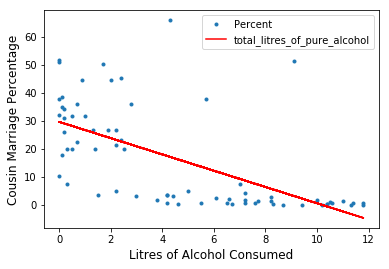

In [16]:
plt.plot(X,Y,'.')
f = lambda x : 29.6483 - 2.8982*x
plt.plot(X,f(X), c="red", )
plt.legend()
plt.xlabel('Litres of Alcohol Consumed', fontsize=12)
plt.ylabel('Cousin Marriage Percentage', fontsize=12)
plt.show()

Somewhat surprisingly, there is a negative correlation between the amount of alcohol consumed and the prevalence of cousin marriage. In fact, the r-squared statistic implies that almost 40% of the cousin marriage trend can be explained (i.e. correlates with) by lack of alcohol. There could be many intrepretations for this, as well as the possibility that the data itself is not that robust. As we shall see below, it is beer that is best at explaining this effect, although all alcoholic drinks mentioned in the data set explain some of the trend.

We can also ask whether there is significant prediction in the opposite direction: does cousin marriage predict alcohol consumption?

In [17]:
P=df['Percent']
P1=sm.add_constant(P)
percent_alcohol=sm.OLS(X,P1).fit()
percent_alcohol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.395
Model:                                      OLS   Adj. R-squared:                  0.386
Method:                           Least Squares   F-statistic:                     44.45
Date:                          Thu, 25 Apr 2019   Prob (F-statistic):           5.62e-09
Time:                                  15:52:01   Log-Likelihood:                -176.14
No. Observations:                            70   AIC:                             356.3
Df Residuals:                                68   BIC:                             360.8
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8279      0.493     13.844      0.000       5.844       7.812
Percent       -0.1364      0.020     -6.667      0.000      -0.177      -0.096
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.576
Skew:                           0.554   Prob(JB):                        0.167
Kurtosis:                       3.015   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

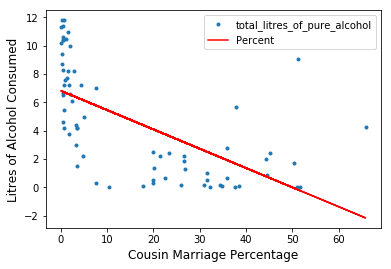

In [18]:
plt.plot(P,X,'.')
f = lambda x : 6.8279 -0.1364*x
plt.plot(P,f(P), c="red")
plt.legend()
plt.xlabel('Cousin Marriage Percentage', fontsize=12)
plt.ylabel('Litres of Alcohol Consumed', fontsize=12)
plt.show()

Again there is a negative correlation (of course), with the same $R^2$ coefficient.

We now look at the different types of alcohol and see if one is a better predictor of cousin marriage than the others. We start with a linear regression on beer servings as a predictor of cousin marriage:

In [19]:
B=df['beer_servings']
B1=sm.add_constant(B)
beer_model=sm.OLS(Y,B1).fit()
beer_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Percent   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     74.81
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.45e-12
Time:                        15:52:01   Log-Likelihood:                -274.75
No. Observations:                  70   AIC:                             553.5
Df Residuals:                      68   BIC:                             558.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.4190      2.123     13.856      0.000      25.182      33.656
beer_servings    -0.1215      0.014     -8.649      0.000      -0.150      -0.093
==============================================================================
Omnibus:                        4.942   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.122
Skew:                           0.562   Prob(JB):                        0.127
Kurtosis:                       3.389   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

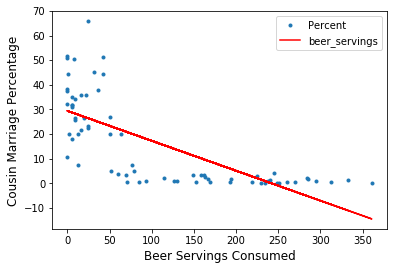

In [20]:
plt.plot(B,Y,'.')
f = lambda x : 29.4190 -0.1215*x
plt.plot(B,f(B), c="red", )
plt.legend()
plt.xlabel('Beer Servings Consumed', fontsize=12)
plt.ylabel('Cousin Marriage Percentage', fontsize=12)
plt.show()

This has a higher $R^2$, meaning that annual beer servings per capita explain about 52% of the drop off in cousin marriage as annual beer servings per capita increase. So beer annual servings per capita better explain the lack of cousin marriage than annual litres of alcohol consumed per capita, according to this data set.

While the $\beta_1$ slope coefficient of the regression line is smaller than the slope coefficient for the total amount of alcohol consumed, this is mainly due to the change in units, since one serving of beer only contains about 0.018 litres of pure alcohol (if the beer has 5% ABV). Larger numbers for the predictor would therefore mean a smaller slope if the dependent variable's units are held fixed. Comapring the graphs, the slopes look very similar because they have been resized to fit all data points, compensating for the change of units. 

Conversely, we get a similar negative correlation for cousin marriage as a predictor of beer consumption:

In [21]:
percent_beer=sm.OLS(B,P1).fit()
percent_beer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          beer_servings   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     74.81
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.45e-12
Time:                        15:52:02   Log-Likelihood:                -399.66
No. Observations:                  70   AIC:                             803.3
Df Residuals:                      68   BIC:                             807.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.2149     12.017     14.831      0.000     154.236     202.194
Percent       -4.3109      0.498     -8.649      0.000      -5.305      -3.316
==============================================================================
Omnibus:                        2.637   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.437
Skew:                           0.373   Prob(JB):                        0.296
Kurtosis:                       2.473   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

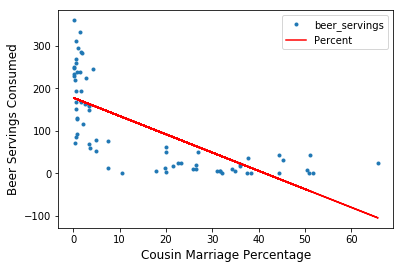

In [22]:
plt.plot(P,B,'.')
f = lambda x : 178.2149 -4.3109*x
plt.plot(P,f(P), c="red")
plt.legend()
plt.xlabel('Cousin Marriage Percentage', fontsize=12)
plt.ylabel('Beer Servings Consumed', fontsize=12)
plt.show()

Next up, to what extent do annual spirit servings per capita predict the prevalence of cousin marraige?

In [23]:
S=df['spirit_servings']
S1=sm.add_constant(S)
spirit_model=sm.OLS(Y,S1).fit()
spirit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Percent   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     30.46
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.76e-07
Time:                        15:52:02   Log-Likelihood:                -287.76
No. Observations:                  70   AIC:                             579.5
Df Residuals:                      68   BIC:                             584.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              27.6759      2.729     10.140      0.000      22.230      33.122
spirit_servings    -0.1660      0.030     -5.519      0.000      -0.226      -0.106
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.552
Skew:                           0.603   Prob(JB):                        0.103
Kurtosis:                       2.672   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

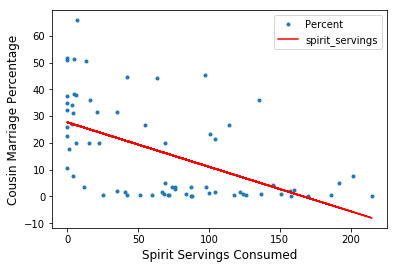

In [24]:
plt.plot(S,Y,'.')
f = lambda x : 27.6759 -0.1660*x
plt.plot(S,f(S), c="red", )
plt.legend()
plt.xlabel('Spirit Servings Consumed', fontsize=12)
plt.ylabel('Cousin Marriage Percentage', fontsize=12)
plt.show()

Here, the $R^2$ is smaller than that of the overall alcohol consumed, meaning that it is not as good a predictor as overall alcohol, and certainly much less than beer. Nevertheless, it does explain about 31% of the decline in the prevalence of cousin marriage as annual servings of spirits per capita increases.

In [25]:
percent_spirits=sm.OLS(S,P1).fit()
percent_spirits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        spirit_servings   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     30.46
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           5.76e-07
Time:                        15:52:03   Log-Likelihood:                -372.41
No. Observations:                  70   AIC:                             748.8
Df Residuals:                      68   BIC:                             753.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.9043      8.142     12.147      0.000      82.656     115.152
Percent       -1.8639      0.338     -5.519      0.000      -2.538      -1.190
==============================================================================
Omnibus:                        4.204   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.139
Skew:                           0.558   Prob(JB):                        0.126
Kurtosis:                       2.584   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

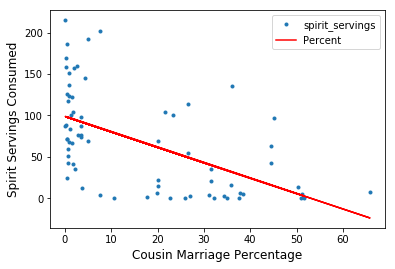

In [26]:
plt.plot(P,S,'.')
f = lambda x : 98.9043 -1.8639*x
plt.plot(P,f(P), c="red")
plt.legend()
plt.xlabel('Cousin Marriage Percentage', fontsize=12)
plt.ylabel('Spirit Servings Consumed', fontsize=12)
plt.show()

Finally, annual wine servings per capita as a predictor of cousin marriage:

In [27]:
W=df['wine_servings']
W1=sm.add_constant(W)
wine_model=sm.OLS(Y,W1).fit()
wine_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Percent   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     26.22
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.70e-06
Time:                        15:52:03   Log-Likelihood:                -289.30
No. Observations:                  70   AIC:                             582.6
Df Residuals:                      68   BIC:                             587.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.4169      2.185     10.261      0.000      18.057      26.776
wine_servings    -0.0981      0.019     -5.120      0.000      -0.136      -0.060
==============================================================================
Omnibus:                        3.510   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                3.427
Skew:                           0.526   Prob(JB):                        0.180
Kurtosis:                       2.739   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

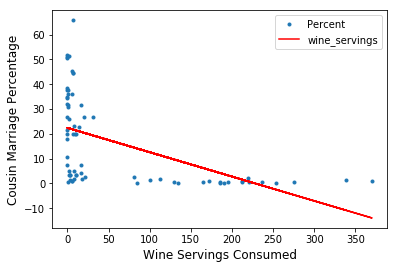

In [28]:
plt.plot(W,Y,'.')
f = lambda x : 22.4169 -0.0981*x
plt.plot(W,f(W), c="red", )
plt.legend()
plt.xlabel('Wine Servings Consumed', fontsize=12)
plt.ylabel('Cousin Marriage Percentage', fontsize=12)
plt.show()

This has the worst $R^2$ of all, but at nearly 28% is still not terrible. Wine is the worst at predicting this trend.

In [29]:
percent_wine=sm.OLS(W,P1).fit()
percent_wine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          wine_servings   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     26.22
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.70e-06
Time:                        15:52:03   Log-Likelihood:                -407.06
No. Observations:                  70   AIC:                             818.1
Df Residuals:                      68   BIC:                             822.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.5659     13.357      8.128      0.000      81.912     135.220
Percent       -2.8368      0.554     -5.120      0.000      -3.942      -1.731
==============================================================================
Omnibus:                       12.250   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.717
Skew:                           0.956   Prob(JB):                      0.00173
Kurtosis:                       3.839   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

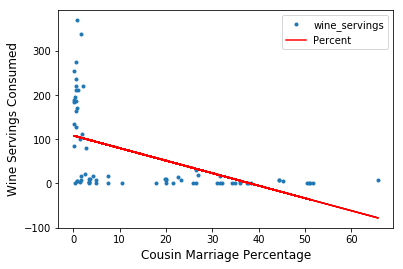

In [30]:
plt.plot(P,W,'.')
f = lambda x : 108.5659 -2.8368*x
plt.plot(P,f(P), c="red")
plt.legend()
plt.xlabel('Cousin Marriage Percentage', fontsize=12)
plt.ylabel('Wine Servings Consumed', fontsize=12)
plt.show()

##### For those interested, the regression in the table above can be calculated 'by hand' below.

First, this function gives the regression coefficients, i.e. the $y$-intercept $\beta_0$ and the line's slope $\beta_1$:

In [31]:
def lin_reg(L):
    x_sq=[L[i][0]**2 for i in range(0,len(L))]
    xy=[L[i][0]*L[i][1] for i in range(0,len(L))]
    x=[L[i][0] for i in range(0,len(L))]
    y=[L[i][1] for i in range(0,len(L))]
    n=len(L)
    X=sum(x)/n
    Y=sum(y)/n
    XY=sum(xy)/n
    X2=sum(x_sq)/n
    b0=(X*XY-X2*Y)/(X**2-X2)
    b1=(X*Y-XY)/(X**2-X2)
    return b0,b1

Next we have the Mean Squared Error, sample variance, $R^2$ coefficient of determination and Pearson correlation coefficient:

In [32]:
def MSE(L):
    L=[(L[i][1]-lin_reg(L)[0]-lin_reg(L)[1]*L[i][0])**2 for i in range(0,len(L))]
    return sum(L)/(len(L)-2)

In [33]:
def sample_variance(L):
    n=len(L)
    A=[L[i][1] for i in range(0,n)]
    av=sum(A)/n
    L=[(L[i][1]-av)**2 for i in range(0,n)]
    return (sum(L)/(n-1))**0.5

In [34]:
def r_squared(L):
    n=len(L)
    b0=lin_reg(L)[0]
    b1=lin_reg(L)[1]
    Y_hat=[b0+b1*L[i][1] for i in range(0,n)]
    A=[L[i][1] for i in range(0,n)]
    avg=sum(A)/n
    Sq=[(a-avg)**2 for a in A]
    SSTO=sum(Sq)
    return 1-MSE(L)*(n-2)/SSTO

In [35]:
def pearson(L):
    if lin_reg(L)[1]>0:
        return r_squared(L)**0.5
    else:
        return -r_squared(L)**0.5

To run all these, we need to convert our dataframe into a list (of lists), which only contains the predictors and dependent variables: 

In [36]:
D=df.values.tolist()
L=[[d[-2],d[-1]] for d in D]
BL=[[d[1],d[-1]] for d in D]
SL=[[d[2],d[-1]] for d in D]
WL=[[d[3],d[-1]] for d in D]

First, we get the linear regression coefficients:

In [37]:
print(lin_reg(L))
print(lin_reg(BL))
print(lin_reg(SL))
print(lin_reg(WL))

(29.64827773417355, -2.8981676741922073)
(29.419044340941255, -0.12151331619667606)
(27.675867764348144, -0.16597388313268766)
(22.416865032793417, -0.09809274468031609)


Next, the mean squared error and sample variance (these are not in the table above):

In [38]:
print(MSE(L))
print(MSE(BL))
print(MSE(SL))
print(MSE(WL))

196.37035375828748
154.62146332410288
224.26450303867117
234.362027070373


In [39]:
print(sample_variance(L))

17.888968633148306


Note that this calculates the variance in the cousin marriage data only, and be the same for all the alcohol data sets.

Finally, the $R^2$ and Pearson coefficient:

In [40]:
print(r_squared(L),pearson(L))
print(r_squared(BL),pearson(BL))
print(r_squared(SL),pearson(SL))
print(r_squared(WL),pearson(WL))

0.39526495193480204 -0.6287010036056901
0.5238333268457211 -0.7237633085793457
0.3093631374146012 -0.5562042227586925
0.2782671671533927 -0.5275103479111976
